# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
display(data_0.head())
display(data_1.head())
display(data_2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [4]:
display("Количество дубликатов:", data_0.duplicated().sum())
display("Количество дубликатов:", data_1.duplicated().sum())
display("Количество дубликатов:", data_2.duplicated().sum())

'Количество дубликатов:'

0

'Количество дубликатов:'

0

'Количество дубликатов:'

0

In [5]:
display(data_0.info())
display(data_1.info())
display(data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [6]:
display(data_0.describe())
display(data_1.describe())
display(data_2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [7]:
data = (data_0, data_1, data_2)

In [8]:
for idx, df in enumerate(data):
    unique_ids = df['id'].unique()
    unique_check = unique_ids.shape[0] == df.shape[0]
    print(f'Уникальные id {idx + 1}: {unique_check}')

Уникальные id 1: False
Уникальные id 2: False
Уникальные id 3: False


In [9]:
for df in data:
    df.drop('id', axis=1, inplace=True)

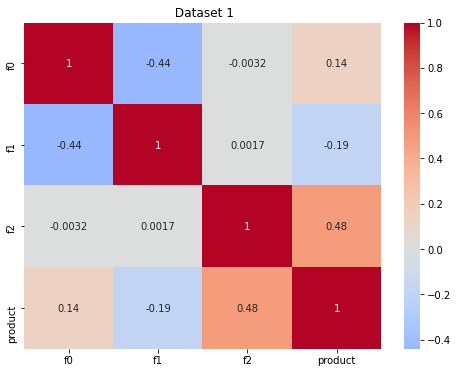

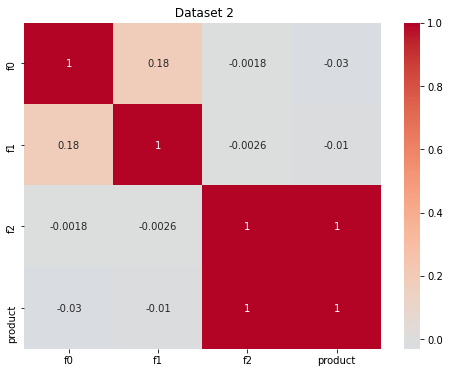

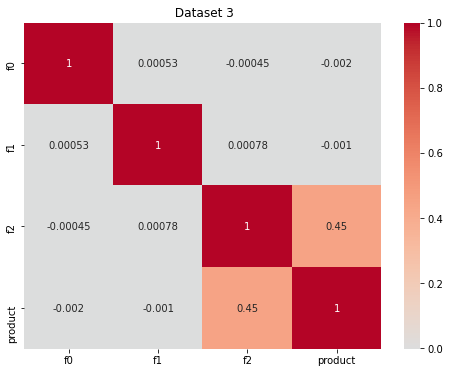

In [10]:
for idx, df in enumerate(data):
    corr_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f" Dataset {idx + 1}")
    plt.show()

**Выводы:**
Выполнила необходимые действия по подготовке данных для решения задачи предсказания оттока клиентов.

- Все столбцы имеют соответствующий тип данных
- В данных не было выявлено пропущенных значений
- Удалила ненужные признаки, которые не нужны для дальнейшего анализа
- Аномальные значения не выявлены
- На основе матрицы корреляций можно сделать следующие выводы:Столбцы f0, f1 и f2 во всех трех наборах данных слабо коррелируют между собой. Корреляция между признаками и целевой переменной product довольно низкая.

Данные готовы для дальнейшего анализа и исследовании.

## Обучение и проверка модели

### Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.

In [11]:
region_predictions = {}
for idx, df in enumerate(data):
    features = df.drop('product', axis=1)
    target = df['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    region_predictions[idx] = {
        'features_train': features_train,
        'features_valid': features_valid,
        'target_train': target_train,
        'target_valid': target_valid
    }

### Обучите модель и сделайте предсказания на валидационной выборке.

In [12]:
for idx, df in enumerate(data):
    features_train = region_predictions[idx]['features_train']
    target_train = region_predictions[idx]['target_train']
    features_valid = region_predictions[idx]['features_valid']
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    
    region_predictions[idx]['predictions_valid'] = predictions_valid

### Сохраните предсказания и правильные ответы на валидационной выборке.

In [13]:
for idx, df in enumerate(data):
    target_valid = region_predictions[idx]['target_valid']
    predictions_valid = region_predictions[idx]['predictions_valid']
    
    region_predictions[idx]['target_valid'] = target_valid
    region_predictions[idx]['predictions_valid'] = predictions_valid
    
    mean_predicted_product = predictions_valid.mean()
    rmse = mean_squared_error(target_valid, predictions_valid, squared=False)
    
    region_predictions[idx]['mean_predicted_product'] = mean_predicted_product
    region_predictions[idx]['rmse'] = rmse

### Напечатайте на экране средний запас предсказанного сырья и RMSE модели.

In [14]:
for idx, df in enumerate(data):
    print(f"Для региона {idx + 1}:")
    print(f"Средний запас предсказанного сырья: {region_predictions[idx]['mean_predicted_product']:.2f}")
    print(f"RMSE модели: {region_predictions[idx]['rmse']:.2f}")
    print()

Для региона 1:
Средний запас предсказанного сырья: 92.59
RMSE модели: 37.58

Для региона 2:
Средний запас предсказанного сырья: 68.73
RMSE модели: 0.89

Для региона 3:
Средний запас предсказанного сырья: 94.97
RMSE модели: 40.03



### Проанализируйте результаты.

На данном этапе выполнены все необходимые действия для обучения и оценки моделей в каждом регионе. 
- Для каждого региона был проведен процесс разбиения данных на обучающую и валидационную выборки в соотношении 75:25 с использованием функции train_test_split. 
- Для каждого региона была создана и обучена модель линейной регрессии с помощью класса LinearRegression. Модель была обучена на обучающей выборке, а затем использована для получения предсказаний на валидационной выборке.
- Был создан DataFrame с предсказаниями и правильными ответами на валидационной выборке для каждого региона. 
- Были вычислены средний запас предсказанного сырья и RMSE модели. Средний запас предсказанного сырья: 94.97
RMSE модели: 40.03

## Подготовка к расчёту прибыли

### Все ключевые значения для расчётов сохраните в отдельных переменных.

In [15]:
EXPLORATION_POINTS = 500
BEST_RESEARCH_POINT = 200
BUDGET = 10_000_000_000
REVENUE_PER_UNIT = 450_000
NUM_WELLS = 200
MAX_PROBABILITY_OF_LOSS = 0.025
CONFIDENCE_INTERVAL = 0.95

budget_per_point = BUDGET / BEST_RESEARCH_POINT
min_product = budget_per_point / REVENUE_PER_UNIT

print(f"Мин. объём сырья для безубыточной разработки новой скважины: {min_product:.2f}")

Мин. объём сырья для безубыточной разработки новой скважины: 111.11


### Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 

In [16]:
for idx, region_data in enumerate(region_predictions.values()):
    region_name = idx + 1
    target_valid = region_data['target_valid']
    mean_predicted_product = region_data['predictions_valid'].mean()

    print(f"Регион {region_name}:")
    print(f"Средний запас сырья: {mean_predicted_product:.2f}")
    

    if min_product > mean_predicted_product:
        print("Средний запас в регионе недостаточен для безубыточной разработки новой скважины")
    else:
        print("Средний запас в регионе превосходит для безубыточной разработки новой скважины")

Регион 1:
Средний запас сырья: 92.59
Средний запас в регионе недостаточен для безубыточной разработки новой скважины
Регион 2:
Средний запас сырья: 68.73
Средний запас в регионе недостаточен для безубыточной разработки новой скважины
Регион 3:
Средний запас сырья: 94.97
Средний запас в регионе недостаточен для безубыточной разработки новой скважины


### Напишите выводы по этапу подготовки расчёта прибыли

**Выводы:**

По результатам расчета достаточного объема сырья для безубыточной разработки новой скважины выяснилось, что минимальный объем сырья для безубыточной разработки составляет 111.11 тысячи баррелей. Далее, было выполнено сравнение объема среднего запаса сырья в каждом из трех регионов с минимальным объемам сырья для безубыточной. 

- В первом регионе ср.запас сырья ~ 92.59 тыс.баррелей, что недостаточно для безубыточной разработки новой скважины.

- В втором  ср.запас сырья ~ 68.73 тыс.баррелей, что также недостаточно для безубыточной разработки новой скважины.

- В третьем ср.запас сырья ~ 94.97 тыс.баррелей, также недостаточно для безубыточной разработки новой скважины.

## Расчёт прибыли и рисков 

In [42]:
def calculate_profit(target, predictions, count):
# 4.1. Выберите скважины с максимальными значениями предсказаний
    top_index = predictions.argsort()[-count:][::-1]
# 4.2 Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям
    selected_target = target.iloc[top_index]
# 4.3 Рассчитайте прибыль для полученного объёма сырья
    revenue = selected_target.sum() * REVENUE_PER_UNIT
    profit = revenue - BUDGET
    return profit

for idx, region_data in enumerate(region_predictions.values()):
    target_valid = region_data['target_valid']
    predictions_valid = pd.Series(region_data['predictions_valid'])
    
    region_profit = calculate_profit(target_valid, predictions_valid, NUM_WELLS)
    
    print(f"Регион {idx + 1}:")
    print(f"Прибыль: {region_profit:.2f}\n")

Регион 1:
Прибыль: 3320826043.14

Регион 2:
Прибыль: 2415086696.68

Регион 3:
Прибыль: 2710349963.60



## Посчитайте риски и прибыль для каждого региона:

In [43]:
bootstrap_samples = 1000
state = np.random.RandomState(12345)

for idx, region_data in enumerate(region_predictions.values()):
    target_valid = region_data['target_valid'].reset_index(drop=True)
    predictions_valid = pd.Series(region_data['predictions_valid'])

    profits = []
    #средняя прибыль 95%-й доверительный интервал и риск убытков
    for i in range(bootstrap_samples):
        subsample_target = target_valid.sample(n=EXPLORATION_POINTS, replace=True, random_state=state)
        subsample_predictions = predictions_valid.iloc[subsample_target.index]
        profits.append(profit(subsample_target, subsample_predictions, BEST_RESEARCH_POINT))
    
    profits = pd.Series(profits)
    lower = profits.quantile((1 - CONFIDENCE_INTERVAL) / 2)
    upper = profits.quantile((1 + CONFIDENCE_INTERVAL) / 2)
    mean_profit = profits.mean()
    risk = (profits < 0).mean()

    print(f"Регион {idx + 1}:")
    print(f"Средняя прибыль: {mean_profit:.2f}")
    print(f"95% доверительный интервал: от {lower:.2f} до {upper:.2f}")
    print(f"Риск убытков: {risk:.2f}\n")

Регион 1:
Средняя прибыль: 396164984.80
95% доверительный интервал: от -111215545.89 до 909766941.55
Риск убытков: 0.07

Регион 2:
Средняя прибыль: 461155817.28
95% доверительный интервал: от 78050810.75 до 862952060.26
Риск убытков: 0.01

Регион 3:
Средняя прибыль: 392950475.17
95% доверительный интервал: от -112227625.38 до 934562914.55
Риск убытков: 0.07



**Выводы**

По результатам анализа, регион 2 представляется наиболее перспективным для разработки скважин. Средняя прибыль в данном регионе составляет 461 155 817.28 тыс.руб. что является самой высокой среди всех трех рассмотренных вариантов. 

Риск убытков в регионе 2 составляет всего 0.01, что гораздо ниже, чем в регионах 1 и 3